[SOFTEX] Residência em TIC - MCTI Futuro - IFMA 


# 6. Introdução ao Deep Learning 
## 6.2 - Conceitos Básicos, TensorFlow e Keras


Elaborado por Prof. Josenildo Silva (jcsilva@ifma.edu.br)

Este notebook é parte do material do Curso de Treinamento em IA criado pelo IFMA/DComp e financiado pelo SOFTEX, 2023.

_Este projeto foi apoiado pelo Ministério da Ciência, Tecnologia e Inovações, com recursos da Lei 8.248 de outubro de 1991_

# Setup

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from numpy import random

In [ ]:
#from sklearn.datasets import fetch_openml

# Tensorflow

In [ ]:
import tensorflow as tf

**Tensorflow** é uma plataforma desenvolvida pela Google em Python para aprendizagem de máquina.  

Provê varias funcionalidades similares ao numpy, mas extende o escopo em vários aspectos. 
- suporte para CPU, GPU, TPU
- computação distribuída
- exporta para C++, JavaScript, etc


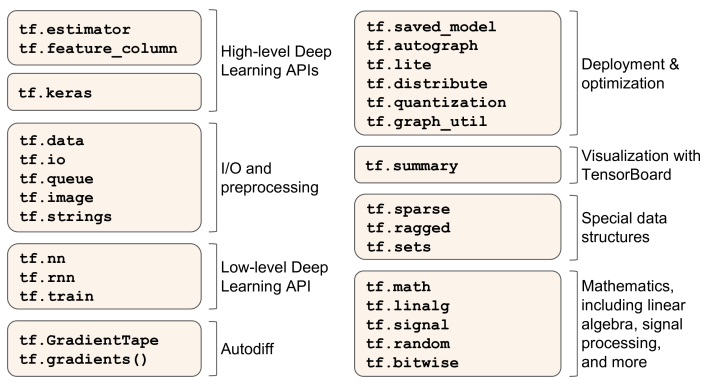

Os dados em tensorflow são representados por estruturas especiais chamadas de tensores, discutidos em detalhes nas próximas seções.



## Tensores

Um **Tensor** é uma coleção de dados do mesmo tipo (dtype), geralmente números. São similares ao array do ```numpy``` . (Chollet,2021), Cap. 2

### Principais atributos de um Tensor

- Número de eixos: rank
- Formato: shape
- Tipo: dtype

### Tensores de rank 0: escalares

No tensoflow um tensor é definido como uma constante

In [ ]:
x0 = tf.constant(12) 
x0

<tf.Tensor: shape=(), dtype=int32, numpy=12>

Escalares não possuem dimensão, ou seja, são objetos de **dimensao zero**.

In [ ]:
x0.ndim

0

In [ ]:


x0.shape

TensorShape([])

### Tensores de rank 1: vetores

In [ ]:
x1 = tf.constant([12,8,-1,4,56, 14])
x1

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([12,  8, -1,  4, 56, 14], dtype=int32)>

Vetores possuem **uma** dimensão

In [ ]:
x1.ndim

1

Em particular, este tensor porssui 6 elementos na sua única dimensão. 

In [ ]:
x1.shape

TensorShape([6])

### Tensores de rank 2: matrizes 

In [ ]:
x2 = tf.constant([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2]])
x2

<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]], dtype=int32)>

Este tensor possui duas dimensões

In [ ]:
x2.ndim

2

In [ ]:
x2.shape

TensorShape([3, 5])

O método `.numpy()` retorna o conteúdo do tensor em formato de ndarray

In [ ]:
x2.numpy()

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]], dtype=int32)

### Tensores de rank 3: cubos

In [ ]:
x3 = tf.constant([[[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]]]
                 )

In [ ]:
x3.ndim

3

In [ ]:
x3.shape

TensorShape([3, 3, 5])

In [ ]:
print(f"Elementos na primeira dimensao: {x3.shape[0]}")
print(f"Elementos na última dimensao: {x3.shape[-1]}")

Elementos na primeira dimensao: 3
Elementos na última dimensao: 5


O total de elementos em um tensor é calculado pelo `tf.size()`

In [ ]:
tf.size(x3)

<tf.Tensor: shape=(), dtype=int32, numpy=45>

In [ ]:
print(f"Total de elementos no tensor: {tf.size(x3)}")

Total de elementos no tensor: 45


### Tensores de rank maior que 3

In [ ]:
x4 = np.array([x3,x3*2])
print(x4)

[[[[  5  78   2  34   0]
   [  6  79   3  35   1]
   [  7  80   4  36   2]]

  [[  5  78   2  34   0]
   [  6  79   3  35   1]
   [  7  80   4  36   2]]

  [[  5  78   2  34   0]
   [  6  79   3  35   1]
   [  7  80   4  36   2]]]


 [[[ 10 156   4  68   0]
   [ 12 158   6  70   2]
   [ 14 160   8  72   4]]

  [[ 10 156   4  68   0]
   [ 12 158   6  70   2]
   [ 14 160   8  72   4]]

  [[ 10 156   4  68   0]
   [ 12 158   6  70   2]
   [ 14 160   8  72   4]]]]


In [ ]:
x4.ndim

4

In [ ]:
x4.shape

(2, 3, 3, 5)

In [ ]:
tf.size(x4).numpy() # 2*3*3*5

90

**Exemplo 1**
- Um dia da semana é um número, rank 0
- Uma semana é um vetor de 7 dias, rank 1
- Um mês é um vetor de 4 semanas, rank 2
- Um ano é um vetor de 12 meses, rank 3
- Uma década é um vetor de 10 anos, rank 4


**Exemplo 2**
- Um pixel é representado por um valor, rank 0
- Uma linha de uma imagem é um vetor de pixel, rank 1
- Uma imagem é um constituido por linhas, rank 2
- Uma imagem colorida possui uma imagem para cada canal, rank 3

**Exemplo 3**: imagens

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

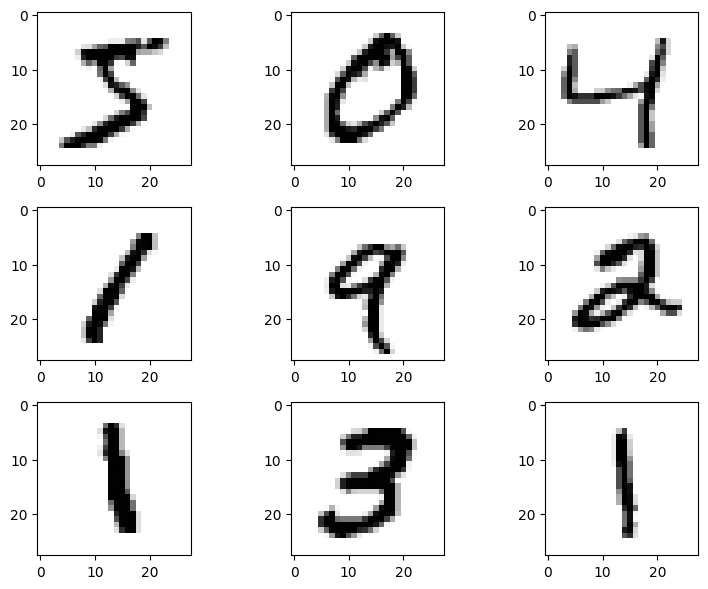

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(8,6))
axes= axes.ravel()
for i,a in enumerate(axes):
  digit_image = train_images[i] # se necessário use reshape(28,28)
  a.imshow(X=digit_image, cmap ='binary')
plt.tight_layout()
plt.show()

In [ ]:
train_images.dtype

dtype('uint8')

## Manipulação de Tensores

### Mudar a forma (reshape)

In [ ]:
x = tf.constant([[0., 1.], [2., 3.], [4., 5.],[6.,7.]])
x

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0., 1.],
       [2., 3.],
       [4., 5.],
       [6., 7.]], dtype=float32)>

In [ ]:
x2 =tf.reshape(x,[2,2,2])
x2

<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[0., 1.],
        [2., 3.]],

       [[4., 5.],
        [6., 7.]]], dtype=float32)>

-1 indica que o tensofflow tem liberdade para encontrar o valor necessário para completar o reshape

In [ ]:
x3 = tf.reshape(x,[2,-1])
x3

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0., 1., 2., 3.],
       [4., 5., 6., 7.]], dtype=float32)>

**Caso especial**: transposição

A operaçao transpose modifica a ordem das dimensões. No caso mais simples, colunas se tornam linhas e vice-versa.

In [ ]:
x = tf.constant([[0., 1., 2.,3.], [4.,5.,6.,7.]])
x

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0., 1., 2., 3.],
       [4., 5., 6., 7.]], dtype=float32)>

In [ ]:
tf.transpose(x)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0., 4.],
       [1., 5.],
       [2., 6.],
       [3., 7.]], dtype=float32)>

### Fatiamento

In [ ]:
x = tf.constant([[0., 1., 2.,3.],
                 [4.,5.,6.,7.]])
x

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0., 1., 2., 3.],
       [4., 5., 6., 7.]], dtype=float32)>

Exemplo: Selecionar todas as linhas das colunas 1 e 2 podemos fazer o seguinte comando

In [ ]:
tf.slice(x,begin=[0,1],size=[2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [5., 6.]], dtype=float32)>

Podemos utilizar cochetes `[ ]` como em python puro

In [ ]:
fatia = x[:,1:3]
fatia

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [5., 6.]], dtype=float32)>

In [ ]:
print(fatia.numpy())

[[1. 2.]
 [5. 6.]]


In [ ]:
fatia

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [5., 6.]], dtype=float32)>

Exemplo com dataset de imagens

Podemos selecionar fatias em qualquer dimensão. 

In [ ]:
fatia = train_images[50:60,14:,14:]

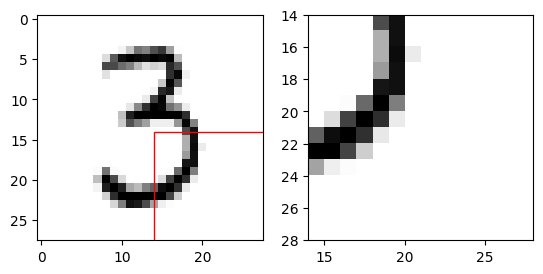

In [ ]:
import matplotlib.patches as patches
crop = fatia[0].reshape(14,14)
fig,(ax1,ax2) = plt.subplots(ncols=2)
ax2.imshow(X=crop, cmap ='binary',origin='upper',extent=(14,28,28,14))
ax1.imshow(X=train_images[50].reshape(28,28),cmap='binary',origin='upper')
rect = patches.Rectangle((14,14), 14, 14, linewidth=1, edgecolor='r', facecolor='none')
ax1.add_patch(rect)
plt.show()

Uma utilização frequente de fatiamente é a divisão de um dataset em *batches* para processamento durante o treinamento de uma rede neural

### Produto entre tensores

O produto entre tensores, ou dot product, é uma das operações fundamentais realizada durante o treinamento de uma rede neural.   


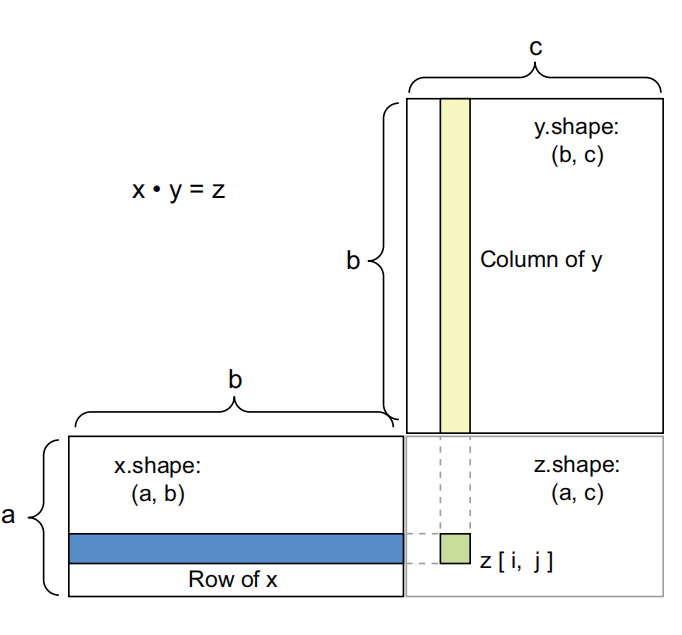

In [ ]:
x = tf.constant([1, 2, 3, 4, 5, 6], 
                shape=[2, 3])
x

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
y = tf.constant([7, 8, 9, 10, 11, 12], 
                shape=[3, 2])
y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10],
       [11, 12]], dtype=int32)>

In [ ]:
z = tf.matmul(x, y)
z

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [ ]:
w = x @ y # python 3.5+
print(w)

tf.Tensor(
[[ 58  64]
 [139 154]], shape=(2, 2), dtype=int32)


#### 0s e 1s

In [ ]:
x = tf.ones(shape=(3, 2)) 
print(x)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [ ]:
x = tf.zeros(shape=(4,5))
print(x)

tf.Tensor(
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]], shape=(4, 5), dtype=float32)


### Valores Aleatórios

In [ ]:
g = tf.random.Generator.from_seed(1)

In [ ]:
x = g.normal(shape=(3000,), 
                     mean=0., 
                     stddev=1.)

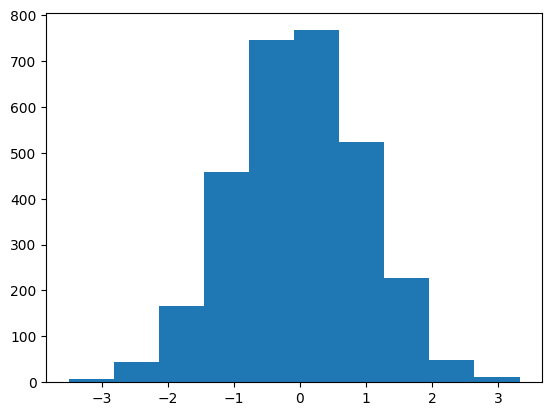

In [ ]:
plt.hist(x)
plt.show()

In [ ]:
x = g.normal(shape=(3, 2), mean=0., stddev=1.)
x

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.9265937 ,  0.1469073 ],
       [ 0.5252305 , -0.86474794],
       [ 0.6861606 , -2.032851  ]], dtype=float32)>

⚠ **ATENÇÃO** ⚠

Tensores são constantes no tensorflow

In [ ]:
# Atribuição é ok em numpy
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

In [ ]:
## Atribuição gera erro tem tensorflow!
#x = tf.ones(shape=(2, 2))
#x[0, 0] = 0. 

### Variáveis

In [ ]:
v = tf.Variable(initial_value=4)
v

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=4>

In [ ]:
v.name

'Variable:0'

In [ ]:
v.shape

TensorShape([])

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 2)))
v

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.7865537 ,  0.24312852],
       [ 0.60265803,  0.60082716],
       [ 0.37333754, -0.7308429 ]], dtype=float32)>

In [ ]:
v.assign([[0,4],[1,4],[2,4]])

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[0., 4.],
       [1., 4.],
       [2., 4.]], dtype=float32)>

In [ ]:
v[0].assign([3,3])

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[3., 3.],
       [1., 4.],
       [2., 4.]], dtype=float32)>

In [ ]:
v[0,0].assign(7)

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[7., 3.],
       [1., 4.],
       [2., 4.]], dtype=float32)>

In [ ]:
v.assign_add(tf.ones((3, 2)))

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[8., 4.],
       [2., 5.],
       [3., 5.]], dtype=float32)>

### Operações Matemáticas com Tensores

Exemplos

```
tf.add(a, b)
tf.subtract(a,b)
tf.multiply(a, b)
a @ b
tf.matmul(a,b)
```

In [ ]:
a = tf.constant([[2, 2],[1,.5]])
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2. , 2. ],
       [1. , 0.5]], dtype=float32)>

In [ ]:
b = tf.square(a)
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4.  , 4.  ],
       [1.  , 0.25]], dtype=float32)>

In [ ]:
b += a
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[6.  , 6.  ],
       [2.  , 0.75]], dtype=float32)>

In [ ]:
c = tf.sqrt(a) 
c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.4142135 , 1.4142135 ],
       [1.        , 0.70710677]], dtype=float32)>

In [ ]:
d = b + c 
d

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[7.4142137, 7.4142137],
       [3.       , 1.4571068]], dtype=float32)>

In [ ]:
e = tf.matmul(a, b) # alternativa a@b
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[16.   , 13.5  ],
       [ 7.   ,  6.375]], dtype=float32)>

In [ ]:
e *= d
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[118.62742 , 100.09188 ],
       [ 21.      ,   9.289056]], dtype=float32)>

Operações de redução

Redução é uma operação que consiste em mapear todos os elementos de um tensor para um escalar. 
```
tf.reduce_sum
tf.reduce_prod
tf.reduce_all
tf.reduce_any
tf.reduce_min
tf.reduce_max
```

In [ ]:
x = tf.constant([[1, 1, 1], 
                 [1, 1, 1]])

In [ ]:
tf.reduce_sum(x).numpy()

6

Pode-se indicar sobre qual dimensão aplicar a redução

In [ ]:
tf.reduce_sum(x, 0).numpy() # linhas

array([2, 2, 2], dtype=int32)

In [ ]:
tf.reduce_sum(x, 1).numpy() # colunas

array([3, 3], dtype=int32)

In [ ]:
tf.reduce_sum(x).numpy() # tudo

6

### Gradientes

GradientTape é um grafo computacional para uma função dada. O Tape permite calcular a derivada de uma dada função em relação a uma de suas variáveis

In [ ]:
def derivada(f,x):
  with tf.GradientTape() as tape:
    tape.watch(x)
    y = f(x)
  
  df_dx = tape.gradient(y, x)
  
  return y,df_dx

In [ ]:
def plot_func_e_deriv(x,y,df_dx):
  fig, axes = plt.subplots(ncols=2,figsize=(16,4))
  axes[0].plot(x, y, label='f(x)')
  axes[1].plot(x, df_dx, label='df/dx',color='red')
  axes[0].legend()
  axes[1].legend()
  axes[0].set_xlabel('x')
  axes[1].set_xlabel('x')
  axes[0].set_ylabel('y= f(x)')
  axes[1].set_ylabel('df(x)')
  plt.show()

In [ ]:
x = tf.linspace(-2, 5, 200+1)

Teste as várias funções abaixo para calcular suas derivadas

In [ ]:
f1 = tf.nn.sigmoid
f2 = lambda x: tf.math.pow(x,3)
f3 = tf.tanh
f4 = tf.nn.softsign
f5 = lambda x: x**2-3*x

In [ ]:
y,df_dx = derivada(f5,x)

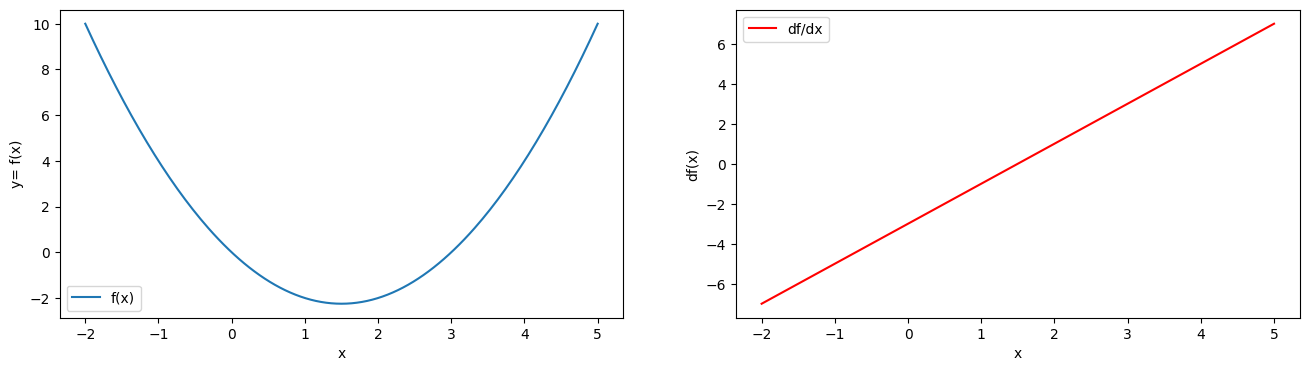

In [ ]:
plot_func_e_deriv(x=x,y=y,df_dx=df_dx)

Também é possível calcular a derivada de segunda ordem. Para isso, é necessário aninhar os contextos (with) e observar a variável em vários tapes diferentes. 

In [ ]:
with tf.GradientTape() as tape_2:
  tape_2.watch(x)
  with tf.GradientTape() as tape_1:
    tape_1.watch(x)
    f = x**2-3*x
  df_dx = tape_1.gradient(f, x)
df2_dx = tape_2.gradient(df_dx, x)

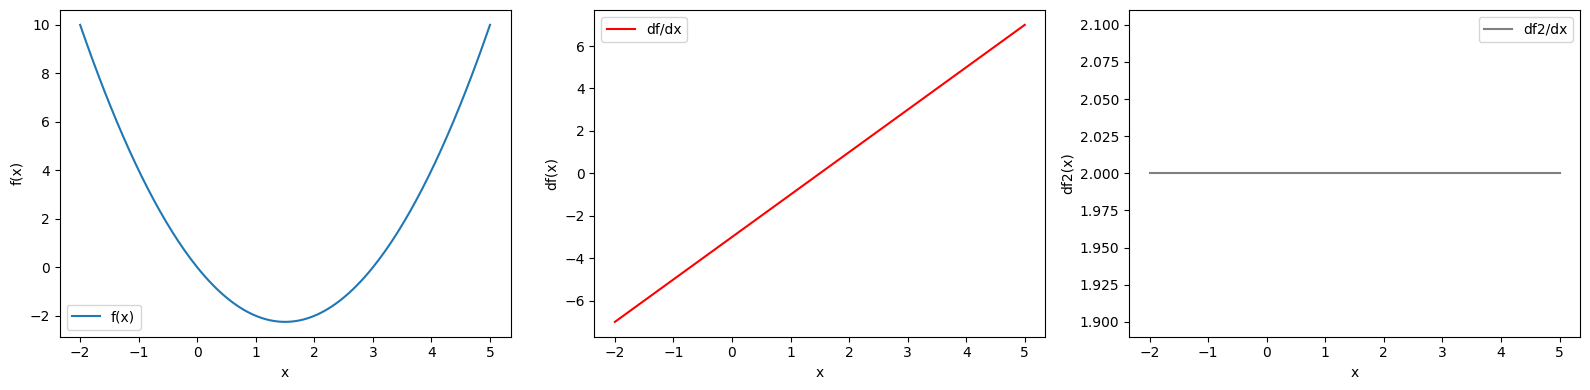

In [ ]:
fig, axes = plt.subplots(ncols=3,figsize=(16,4))
axes[0].plot(x, f, label='f(x)')
axes[1].plot(x, df_dx, label='df/dx',color='red')
axes[2].plot(x, df2_dx, label='df2/dx',color='gray')
axes[0].set_xlabel('x')
axes[1].set_xlabel('x')
axes[2].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[1].set_ylabel('df(x)')
axes[2].set_ylabel('df2(x)')
axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.tight_layout()
plt.show()

O GradientTape é utilizado para calcular a derivada da função de custo durante o treinamento de redes neurais

### Exemplo em Tensorflow: classificador linear

Dataset com duas classes

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], 
                                                 cov=[[1, 0.5],[0.5, 1]], 
                                                 size=num_samples_per_class) 
positive_samples = np.random.multivariate_normal(mean=[3, 0], 
                                                 cov=[[1, 0.5],[0.5, 1]],
                                                 size=num_samples_per_class)

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

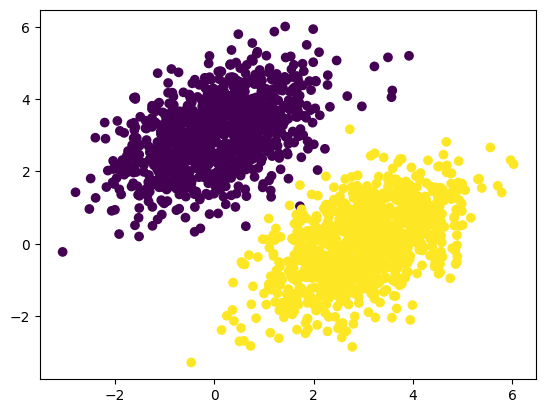

In [ ]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Funções para definir o classificador: 
$\hat{y} = Wx + b$

In [ ]:
def predict(inputs):
 return tf.matmul(inputs, W) + b

Função de custo: 
\begin{equation}
Loss = \frac{1}{N} \sum_{i=1}^{N} \left( y_i - \hat{y}_i\right)^2
\end{equation}

onde $N$ é o tamanho do dataset

In [ ]:
def mean_square_loss(targets, predictions):
 per_sample_losses = tf.square(targets - predictions) 
 return tf.reduce_mean(per_sample_losses)

Atualização dos pesos W e b: 
\begin{equation}
w^{(i+1)} = w^{(i)} - \eta \nabla W   
\end{equation}

In [ ]:
def update(inputs, targets,lr=0.01):
   with tf.GradientTape() as tape: 
     predictions = predict(inputs) 
     loss = mean_square_loss(predictions, targets)
     dl_dW, dl_db = tape.gradient(loss, [W, b]) 
     W.assign_sub(lr*dl_dW) 
     b.assign_sub(lr*dl_db) 
     return loss

Loop de treinamento

In [ ]:
def fit(x,y, repeticoes=10,learning_rate=0.01):
  losses = []
  for step in range(repeticoes):
    loss = update(inputs=x, targets=y,lr=learning_rate) 
    losses.append(loss)
    if (step%10==0):
      print(f"Loss at step {step}: {loss:.4f}")
  return losses

Exemplo de uso

In [ ]:
input_dim = 2
output_dim = 1 
dims=(input_dim,output_dim)

inicia_W = tf.random.uniform(shape=dims)
inicia_b = tf.zeros(shape=(output_dim,))
W = tf.Variable(initial_value=inicia_W)
b = tf.Variable(initial_value=inicia_b)

In [ ]:
taxa_aprend = 0.1

In [ ]:
custo = fit(inputs,
        targets,
        repeticoes=50,
        learning_rate=taxa_aprend)

Loss at step 0: 5.0952
Loss at step 10: 0.0872
Loss at step 20: 0.0502
Loss at step 30: 0.0351
Loss at step 40: 0.0290


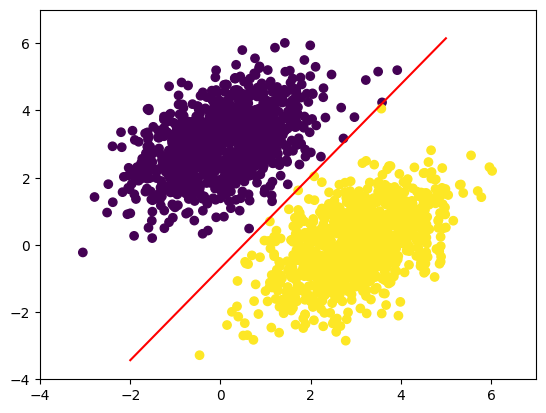

In [ ]:
y_hat = predict(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=y_hat[:, 0] > 0.5)
x = np.linspace(-2, 5, 10) 
y = - W[0] / W[1] * x + (0.5 - b) / W[1] 
plt.plot(x, y, "-r")
plt.ylim(-4,7)
plt.xlim(-4,7)
plt.show()

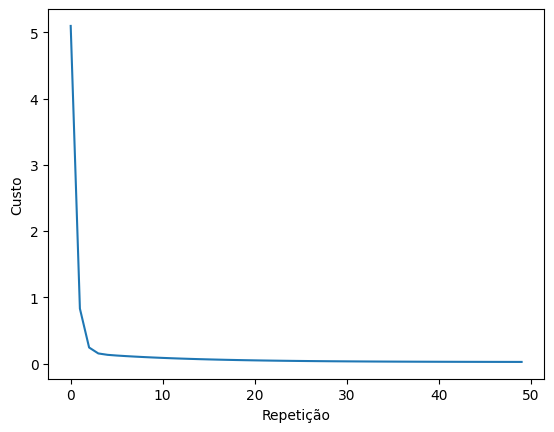

In [ ]:
plt.plot(custo)
plt.xlabel("Repetição")
plt.ylabel("Custo")
plt.show()

In [ ]:
print(f"W: {W.numpy().flatten()}")
print(f"b: {b.numpy()}")

W: [ 0.17427105 -0.12733217]
b: [0.4115064]


# TF Keras

**Keras** é uma API de alto nível desenvolvido para facilitar o uso de tensorflow. Keras foi lançado em 2015, e inicialmente foi desenvolvido sobre o Theano, outra
biblioteca para manipulação de tensores que também tem diferenciação automática de
funções. Em 2018 o Keras foi escolhido pelo Tensoflow como sua API de alto nível oficial.

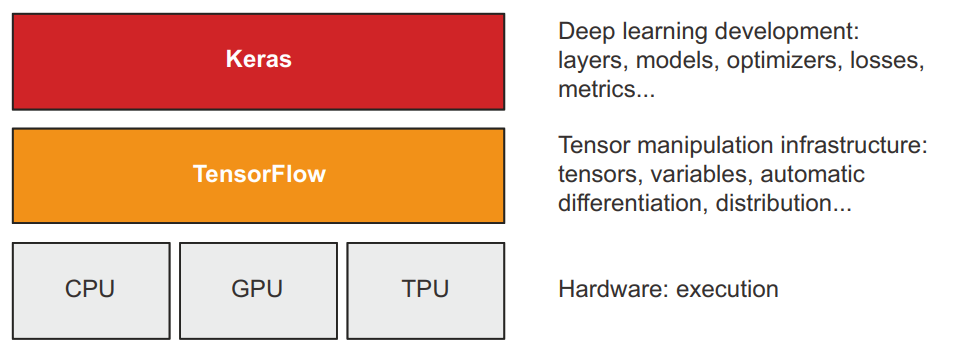

## Layers

Camadas são unidades de processamento no Keras que recebem um tensor de entrada e produzem outro tensor de saída. Os pesos de uma camada são aprendidos durante o treinamento da rede.

Tipos de camadas:

* Input, 
* Dense, 
* Activation, 
* Convolution, 
* Pooling, 
* Recurrent, 
* Preprocessing, 
* Normalization, 
* Regularization, 
* Attention, 
* Reshaping, 
* Merging




In [ ]:
from tensorflow import keras
from keras import layers

In [ ]:
class SimpleDense(keras.layers.Layer): 
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation
  def build(self, input_shape): 
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, 
                                    self.units),
                             initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,),
                             initializer="zeros")
  def call(self, inputs): 
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu) 
input_tensor = tf.ones(shape=(2, 784)) 
output_tensor = my_dense(input_tensor)

In [ ]:
print(output_tensor.shape)

(2, 32)


Camada Densa (MLP totalmente conectada)

In [ ]:
layer = layers.Dense(units=32, activation="relu") 

O formato da entrada é descoberto de modo automático, não é ncessário informar. 


In [ ]:
output = layer(input_tensor) # shape automatico

In [ ]:
output.shape

TensorShape([2, 32])

Camada de ativação

In [ ]:
layer = layers.Activation('relu')
output = layer([-3.0, -1.0, 0.0, 2.0])

In [ ]:
output.numpy()

array([0., 0., 0., 2.], dtype=float32)

In [ ]:
layer = layers.Activation(tf.nn.relu)
output = layer([-3.0, -1.0, 0.0, 2.0])

In [ ]:
output.numpy()

array([0., 0., 0., 2.], dtype=float32)

## Model

Uma rede neural em Keras é um grafo de camadas represendado pela classe Model. 
O modelo mais simples é o Sequential, mas o Keras permite
a definição de modelos com topologia complexa, não-sequencial.

> Picking the **right network** architecture is more an art than a science, and although
there are some best practices and principles you can rely on, only practice can help
you become a proper neural-network architect" -- (Chollet, Cap. 3, p. 87)

Exemplo de modelo sequencial

In [ ]:
model = keras.Sequential(layers=[
    layers.Input(shape=(728,)),
    layers.Dense(units=512, activation="relu",name="Escondida_1"),
    layers.Dense(units=256, activation="relu",name="Escondida_2"),
    layers.Dense(units=10, activation="softmax",name="Saida")],
    name="Exemplo_Sequencial"
)

Alternativa é usar o método add()

In [ ]:
model = keras.Sequential(name="Exemplo_Sequencial")
model.add(layers.Input(shape=(728,)))
model.add(layers.Dense(units=512, activation="relu",name="Escondida_1"))
model.add(layers.Dense(units=256, activation="relu",name="Escondida_2"))
model.add(layers.Dense(units=10, activation="softmax",name="Saida"))

Exemplos de modelos não-sequenciais:
- Multiheads
- Two branches
- Residuals

## Compilação

O método compile() configura o processo de treinamento. Geralmente são informados:
- o otimizador, 
- a função de custo e 
- as métricas a serem utilizados no
treinamento.

In [ ]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [ ]:
model.build()

In [ ]:
model.summary()

Model: "Exemplo_Sequencial"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Escondida_1 (Dense)         (None, 512)               373248    
                                                                 
 Escondida_2 (Dense)         (None, 256)               131328    
                                                                 
 Saida (Dense)               (None, 10)                2570      
                                                                 
Total params: 507,146
Trainable params: 507,146
Non-trainable params: 0
_________________________________________________________________


### Treinamento

Para treinar um modelo utiliza-se `model.fit()`. Principais parâmetros:

* x: tensor com as infomações de treinamento
* y: targets
* epochs: quantidade de repetições

### Salvando Modelos

```
model.save("path")
```

## Exemplo

Keras Datasets

O Keras tem uma pequena coleção de datasets
- MNIST digits classification dataset.
- CIFAR10 small images classification dataset.
- CIFAR100 small images classification dataset.
- IMDB movie review sentiment classification dataset.
- Reuters newswire classification dataset.
- Fashion MNIST dataset, an alternative to MNIST.
- Boston Housing price regression dataset.

Para uma coleção mais completa, você pode utilizar o TF Datasets, que apresenta uma larga quantidade de datasets de exemplo

https://www.tensorflow.org/datasets/catalog/overview

Usaremos o dataset MNIST 

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

O dataset MNIST possui 70 mil exemplos de dígitos escritos à mão, com forma de 784 pixels de imagens 28x28

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Vamos visualizar alguns exemplos deste dataset
 



**Nota** Os rótulo no dataset do tensorflow são do tipo int

Precisamos modificar os dados para que os valores sejam reescalados entre 0 e 1

In [ ]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

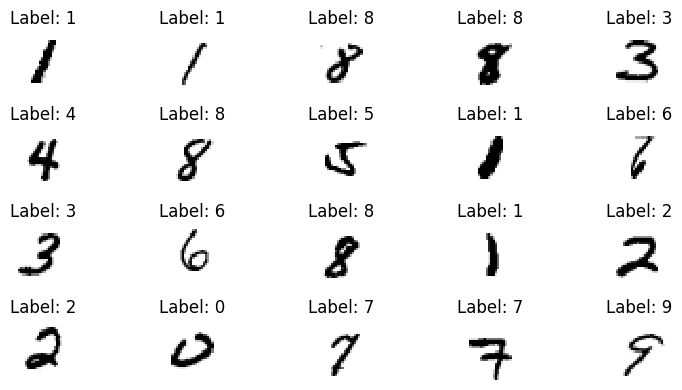

In [ ]:
fig,axes = plt.subplots(nrows=4,ncols=5,figsize=(8,4))
for ax_r in axes:
  for ax in ax_r:
    r = random.randint(0,len(train_labels))
    some_digit_image =train_images[r]#.reshape(28,28)
    ax.imshow(X=some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
    ax.set_title("Label: "+str(train_labels[r]))
    ax.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
print("x_train shape:", train_images.shape)
print(train_images.shape[0], "train samples")
print(test_images.shape[0], "test samples")

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


## Modelo

In [ ]:
num_classes = 10
formato_entrada = (28, 28)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=formato_entrada),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax') ]
    )

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

## Treinamento

In [ ]:
history = model.fit(x= train_images, 
                    y= train_labels, 
                    epochs=10, 
                    batch_size=128
                    )

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.3582 - accuracy: 0.9003
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1651 - accuracy: 0.9533
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1166 - accuracy: 0.9664
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0903 - accuracy: 0.9740
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0718 - accuracy: 0.9788
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0595 - accuracy: 0.9825
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0503 - accuracy: 0.9853
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0430 - accuracy: 0.9874
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0363 - accuracy: 0.9898
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0310 - accuracy: 0.9916

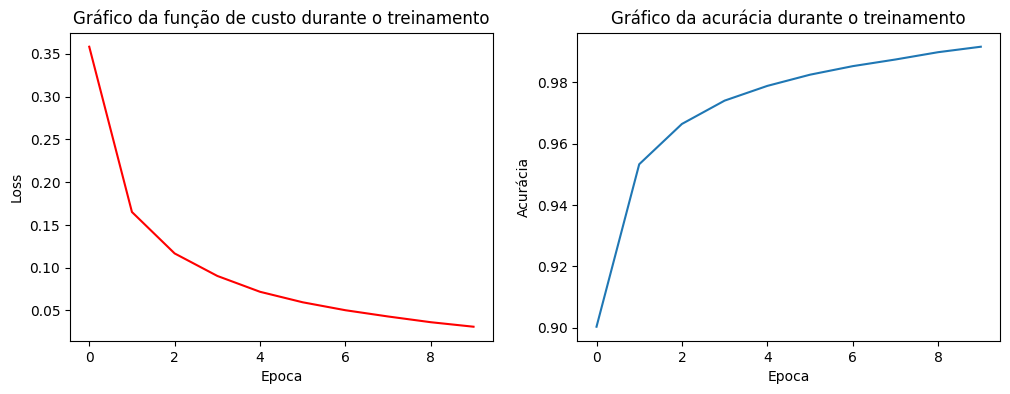

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
axes[0].plot(history.history['loss'],color='red')
axes[0].set_title("Gráfico da função de custo durante o treinamento")
axes[0].set_xlabel("Epoca")
axes[0].set_ylabel("Loss")
axes[1].plot(history.history['accuracy'])
axes[1].set_title("Gráfico da acurácia durante o treinamento")
axes[1].set_xlabel("Epoca")
axes[1].set_ylabel("Acurácia")
plt.show()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


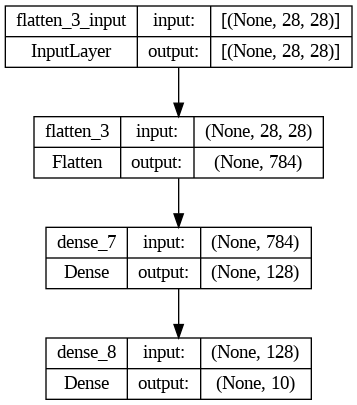

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

## Inferência

In [ ]:
test_images[0].shape

(28, 28)

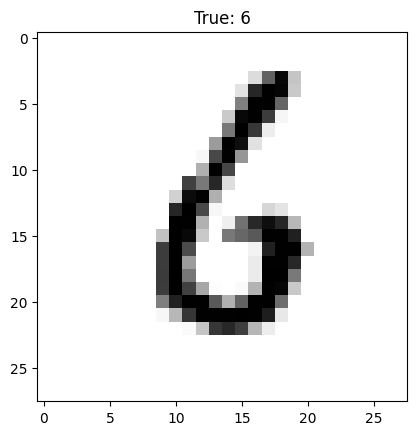

In [ ]:
i = 50
plt.imshow(test_images[i],cmap='binary')
plt.title(f"True: {test_labels[i]}")
plt.show()

Usando ``__call__()`` implicito

In [ ]:
y_hat = model(test_images[np.newaxis,i])

In [ ]:
print(f"predito:  {np.argmax(y_hat)}")

predito:  6


Usando `predict()`

In [ ]:
y_hat = model.predict(tf.constant(test_images[None,i]))

1/1 [==============================] - 0s 25ms/step


In [ ]:
print(f"predito:  {np.argmax(y_hat)}")

predito:  6


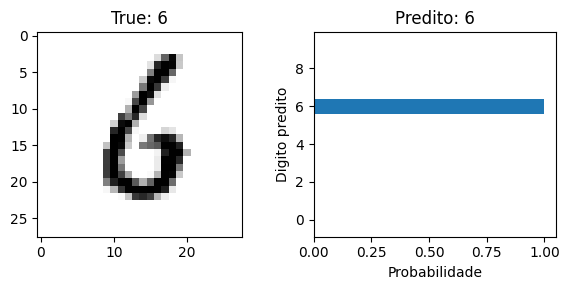

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(6,3))
axes[0].imshow(test_images[i],cmap='binary')
axes[0].set_title(f"True: {test_labels[i]}")
axes[1].barh(y=np.arange(10),width=y_hat.reshape(10))
axes[1].set_xlabel("Probabilidade")
axes[1].set_ylabel("Digito predito")
axes[1].set_title(f"Predito: {np.argmax(y_hat)}")
plt.tight_layout()

## Salvar e carregar

In [ ]:
model.save("deep_net_keras_exemplo.tf")

In [ ]:
loaded = keras.models.load_model("deep_net_keras_exemplo.tf")

Usar o modelo carregado

In [ ]:
y_hat = loaded.predict(test_images[None,i])

1/1 [==============================] - 0s 157ms/step


In [ ]:
np.argmax(y_hat)

3

# Referências

- CHOLLET, F. (2021) "Deep Learning with Python, Tensorflow and Keras", 2nd. Ed. Manning.